Dataset: https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction
Github: https://github.com/MatthewThompson35/DataAnalyticsProject3

Naive Bayes Algorithm: Most information came from https://www.datacamp.com/tutorial/naive-bayes-scikit-learn
Other information came from watching various youtube videos and websites to understand the concepts

The Naive Bayes algorithm determines the outcome computing the likelihood of various outcomes and selects the one with the highest probability as the final prediction. The algorithm calculates the prior probability for each class and estimates the likelihood probability for each feature within each class(basically how often the feature appeared in that class). The resulting probabilities are plugged into the Bayes formula to calculate the posterior probabilty and the result is the class with the highest probability and is considered the outcome.

Bayes Formula: (P(B|A)*P(A)/P(B))

Naive Bayes is mainly used with categorical features and for predicting classification problems. My problem is a binary classification problem. 

Advantages:
    - Conceptually easy to understand
    - It is a fast algorithm that is good for large datasets.
    - Performs well with limited training data
    - Isnt hurt by irrelevant features because of assuming feature independence

Disadvantages:
    - Assumption of feature independence could be a problem when features are correlated
    - If there is not a training tuple of a specific class the model will not be able to be trained correctly.

The accuracy for this algorithm was a little under 80% so I tried using another algorithm as well

Ada Boost Algorithm:  Most information came from https://www.datacamp.com/tutorial/adaboost-classifier-python
Other information came from watching various youtube videos and websites to understand the concepts

AdaBoost is short for Adaptive Boosting and is an ensemble machine learning algorithm. It helps improve performance of weaker classifiers and create a robust and accurate classifier.

AdaBoost works by selecting a training subset randomly. It then iteratively trains the AdaBoost model by selecting the training set based on the accurate prediction of the last training. It assigns more weight to wrong observations so that in the next iteration it will recieve more focus. It also assigns weights to the training classifiers to continue using the more reliable classifiers. This process repeats until the training data fits without error or reaches the max iterations

Process:

All weights start at 1/n where n is the number of samples

In each iteration, you train a classifier and evaluate its performance.

It then increases the weight of the falsely predicted samples so that they become more influential in the next iteration.

It calculates the accuracy of the classifier and assigns weight to the classifier. the more accurate classifier will have a higher weight. 

It repeats until the final number of iterations and then makes a final prediction by combining the predictions of all classifiers weighted based on the accuracy.

Primarily used for classification problems.

Advantages:
    - Easy to implement
    - Improves accuracy of weaker models
    - Can use many classifiers as a base
    - Not prone to overfitting.

Disadvantages:
    - Sensitive to noise data.
    - Highly affected by outliers since it tries to fix each point perfectly
    - Relatively slower than other boosters


In [255]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('heart.csv')
df = df.drop_duplicates()
print(df.isnull().sum())

df.info()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: floa

In [256]:
print(df['HeartDisease'].value_counts())

1    508
0    410
Name: HeartDisease, dtype: int64


The target variable is not exactly balanced

Comparing numerical features to target variable using boxplots to see how the features relate to the target variable. If there is no variance, the feature can be dropped.

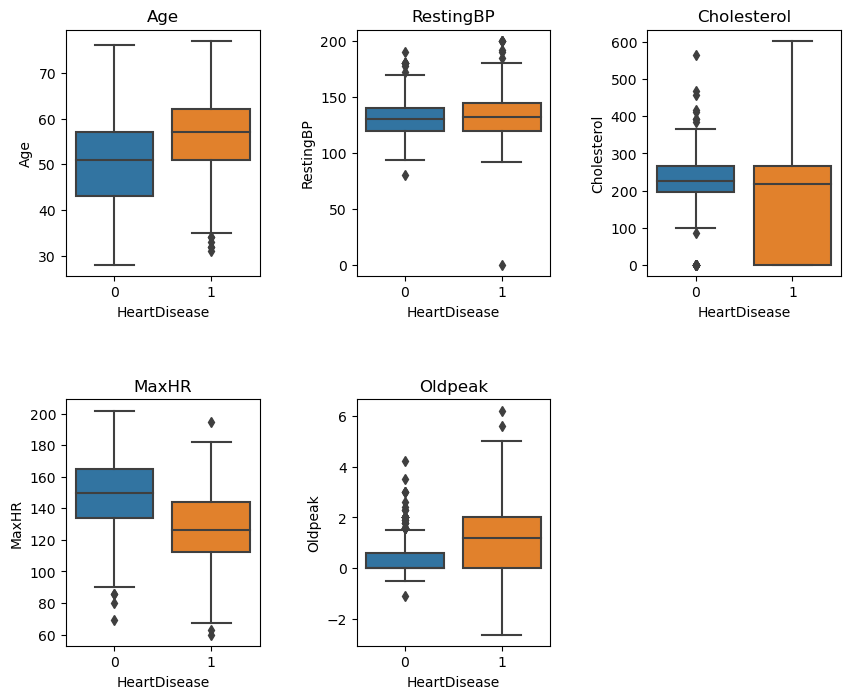

In [257]:
import seaborn as sns
numerical = df.select_dtypes(include=['float64', 'int64']).columns.drop(['HeartDisease', 'FastingBS'])
fig=plt.figure(figsize=(10, 8))

for i in range(len(numerical)):
    column=numerical[i]
    sub=fig.add_subplot(2,3,i+1)
    sns.boxplot(x='HeartDisease',y=column, data=df)
    sub.set_title(column)

plt.subplots_adjust(wspace=0.5, hspace=0.5)
df = df.drop(columns=['RestingBP'], axis=1)

RestingBP shows slight variance in relation to the target variable which is heart Disease. Max Hr and Age has some noticable variance between itself and the target, and Oldpeak and Cholesterol have high variance in relation to the target. 

I dropped RestingBP because it showed little significance in relation to the target.

Performing the Anova F test to see which numerical features so little to no significance to the problem and are able to be dropped.

In [258]:
from sklearn.feature_selection import SelectKBest, f_classif

x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

features = ['Age', 'MaxHR', 'Cholesterol', 'Oldpeak']
numerical_x = x[features]

fs = SelectKBest(f_classif, k='all')


features = fs.fit(numerical_x, y)

print("F-scores:")
print(features.scores_)

print("\nP-values:")
print(features.pvalues_)

F-scores:
[ 79.16077949 174.91358529  52.45972492 178.61512031]

P-values:
[3.00795324e-18 1.13778598e-36 9.30830888e-13 2.39077242e-37]


All of the features seem to be significant to the problem and the pvalues are very low.

Creating bar charts for categorical features to visualize class distribution and see if the features are significant for the model.

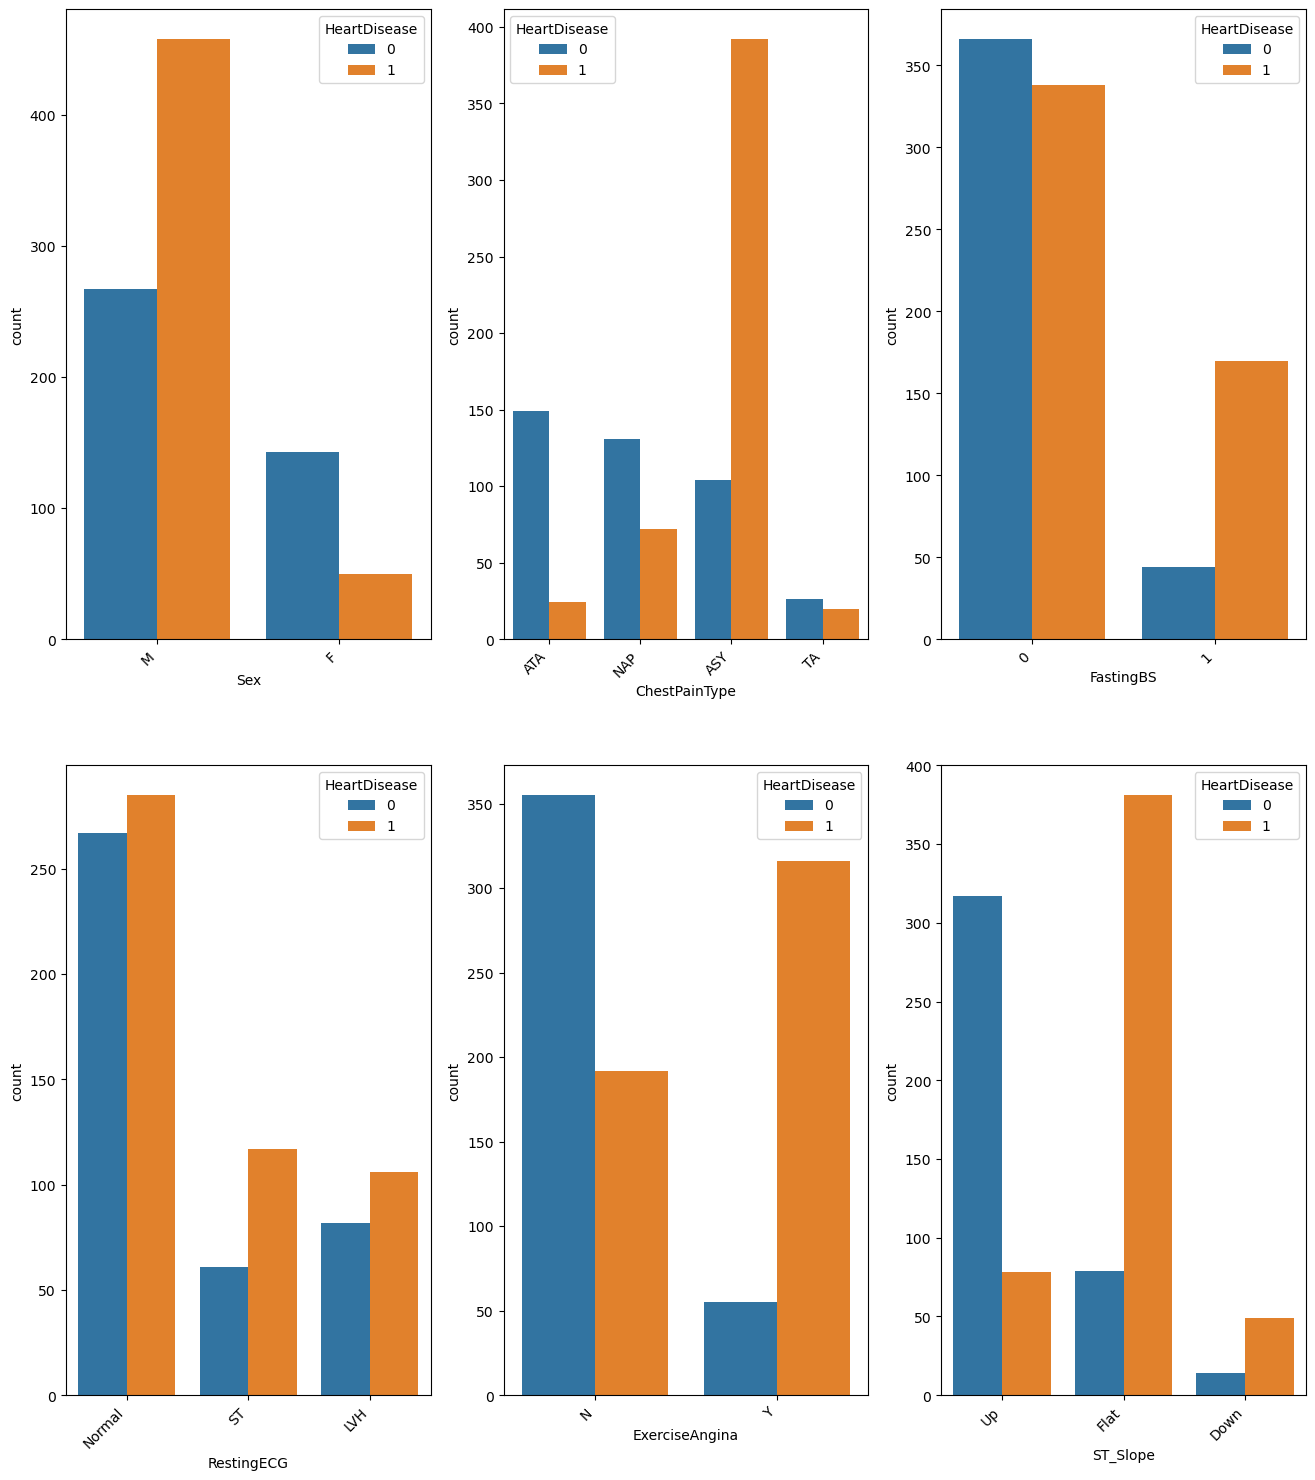

In [259]:
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
   
fig=plt.figure(figsize=(16,18))
for i in range(len(categorical_features)):
    column=categorical_features[i]
    sub=fig.add_subplot(2,3,i+1)
    chart=sns.countplot(x=column, hue='HeartDisease', data=df)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')

From the data, it looks like males are more probable to have Heart Diseases than women are. Although more men were tested than women. It also seems that people with Chest Pain Type ASY are more probably to have heart diseases over the other types of chest pains. Having Yes for ExerciseAngina also seems more probably to have a heart disease and also having a flat ST_Slope

Converting categorical features to numerical categorical with unique values

In [260]:
df['HeartDisease'] = df['HeartDisease'].astype('category').cat.codes
df['ST_Slope'] = df['ST_Slope'].astype('category').cat.codes
df['RestingECG'] = df['RestingECG'].astype('category').cat.codes
df['ExerciseAngina'] = df['ExerciseAngina'].astype('category').cat.codes
df['ChestPainType'] = df['ChestPainType'].astype('category').cat.codes
df['Sex'] = df['Sex'].astype('category').cat.codes

In [261]:
print(df.corr())

                     Age       Sex  ChestPainType  Cholesterol  FastingBS  \
Age             1.000000  0.055750      -0.077150    -0.095282   0.198039   
Sex             0.055750  1.000000      -0.126559    -0.200092   0.120076   
ChestPainType  -0.077150 -0.126559       1.000000     0.067880  -0.073151   
Cholesterol    -0.095282 -0.200092       0.067880     1.000000  -0.260974   
FastingBS       0.198039  0.120076      -0.073151    -0.260974   1.000000   
RestingECG     -0.007484  0.071552      -0.072537    -0.196544   0.087050   
MaxHR          -0.382045 -0.189186       0.289123     0.235792  -0.131438   
ExerciseAngina  0.215793  0.190664      -0.354727    -0.034166   0.060451   
Oldpeak         0.258612  0.105734      -0.177377     0.050148   0.052698   
ST_Slope       -0.268264 -0.150693       0.213521     0.111471  -0.175774   
HeartDisease    0.282039  0.305445      -0.386828    -0.232741   0.267291   

                RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  \

None of the featues are correlated enough to be dropped

Chi2 Test

In [262]:
from sklearn.feature_selection import SelectKBest, chi2
categorical_features = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
x = df[categorical_features]
y = df['HeartDisease']

chi = SelectKBest(chi2, k='all')
cat_features = chi.fit(x, y)

print("Chi-squared scores:")
print(cat_features.scores_)

print("\nP-values:")
print(cat_features.pvalues_)
print(x.columns)

df = df.drop(columns=['RestingECG'], axis=1)

Chi-squared scores:
[ 18.00624316 160.73687834  50.29698303   1.21813572 133.64013403
  77.48668007]

P-values:
[2.20181680e-05 7.81000905e-37 1.32152556e-12 2.69726828e-01
 6.54928900e-31 1.33620549e-18]
Index(['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina',
       'ST_Slope'],
      dtype='object')


Dropped RestingECG because it indicated it did not have strong significance and its pvalue was a little high.

Creating dummy variables.

In [263]:
df = pd.get_dummies(df, columns=['ChestPainType'], drop_first=True)

Split data into train/test

In [264]:
from sklearn.model_selection import train_test_split

x = df.drop(['HeartDisease'], axis=1)
y = df['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=5, stratify=y)

Oversampling the data because it was not exactly balanced

In [265]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
oversampled_x,oversampled_y=os.fit_resample(x_train, y_train)

print(f'before {x_train.shape}')
print(f'after {oversampled_x.shape}')

before (734, 11)
after (812, 11)


Building the Naive Bayes model

Accuracy Score: 0.7989130434782609
Precision: 0.7981651376146789
Recall: 0.8529411764705882


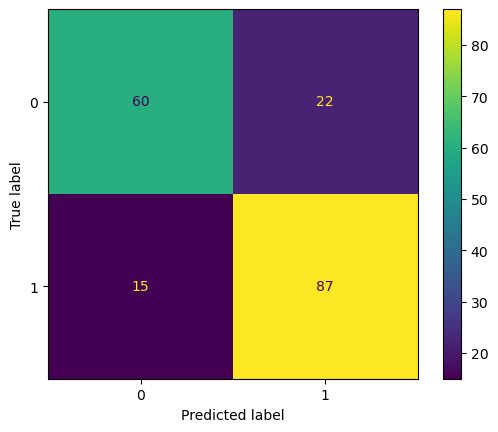

In [266]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay

naive_bayes = GaussianNB()
naive_bayes.fit(oversampled_x, oversampled_y.values.ravel())

test_pred_nb = naive_bayes.predict(x_test)

print(f'Accuracy Score: {accuracy_score(y_test, test_pred_nb)}')
print(f"Precision: {precision_score(y_test, test_pred_nb)}")
print(f"Recall: {recall_score(y_test, test_pred_nb)}")
ConfusionMatrixDisplay.from_estimator(naive_bayes, x_test, y_test)

Logistic Regression Model:

Accuracy Score: 0.8369565217391305
Precision: 0.839622641509434
Recall: 0.8725490196078431


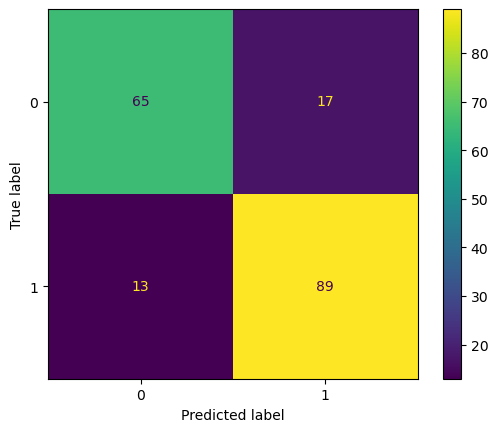

In [267]:
from sklearn.linear_model import LogisticRegression
LogRegression = LogisticRegression(penalty=None, max_iter=2000)
LogRegression.fit(oversampled_x, oversampled_y.values.ravel())

test_pred_log = LogRegression.predict(x_test)

print(f'Accuracy Score: {accuracy_score(y_test, test_pred_log)}')
print(f"Precision: {precision_score(y_test, test_pred_log)}")
print(f"Recall: {recall_score(y_test, test_pred_log)}")
ConfusionMatrixDisplay.from_estimator(LogRegression, x_test, y_test)

Ada Boost with Logistic Regression base

Accuracy Score: 0.8315217391304348
Precision: 0.8317757009345794
Recall: 0.8725490196078431


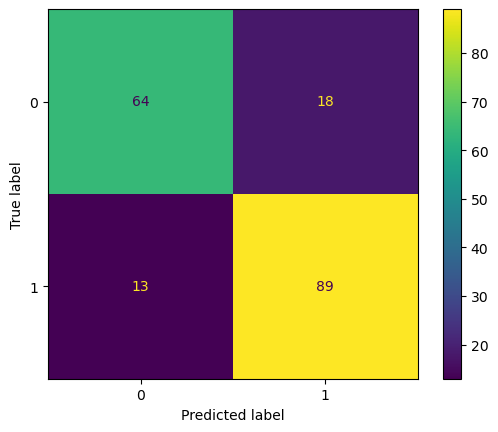

In [268]:
from sklearn.ensemble import AdaBoostClassifier

adaboost_log = AdaBoostClassifier(n_estimators=50, estimator=LogRegression, random_state=2)
adaboost_log.fit(oversampled_x, oversampled_y.values.ravel())

test_pred_ada = adaboost_log.predict(x_test)

print(f'Accuracy Score: {accuracy_score(y_test, test_pred_ada)}')
print(f"Precision: {precision_score(y_test, test_pred_ada)}")
print(f"Recall: {recall_score(y_test, test_pred_ada)}")
ConfusionMatrixDisplay.from_estimator(adaboost_log, x_test, y_test)

K nearest neighbor model:

Accuracy Score: 0.6793478260869565
Precision: 0.7009345794392523
Recall: 0.7352941176470589


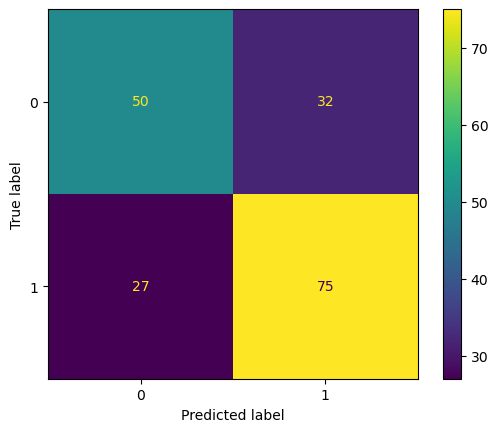

In [269]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(x_train, y_train)

test_pred_knn = knn.predict(x_test)

print(f'Accuracy Score: {accuracy_score(y_test, test_pred_knn)}')
print(f"Precision: {precision_score(y_test, test_pred_knn)}")
print(f"Recall: {recall_score(y_test, test_pred_knn)}")
ConfusionMatrixDisplay.from_estimator(knn, x_test, y_test)

Decision Tree Model:

Accuracy Score: 0.7608695652173914
Precision: 0.7788461538461539
Recall: 0.7941176470588235


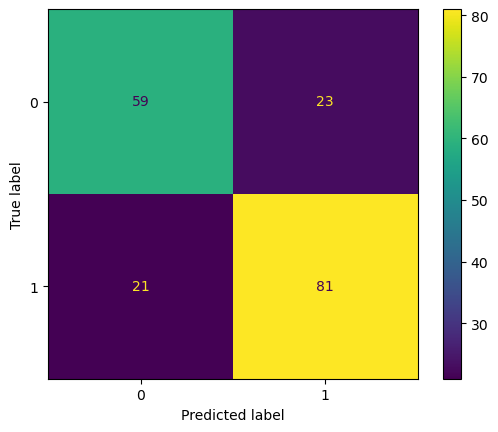

In [270]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(oversampled_x, oversampled_y.values.ravel())

test_pred_dt = dt.predict(x_test)

print(f'Accuracy Score: {accuracy_score(y_test, test_pred_dt)}')
print(f"Precision: {precision_score(y_test, test_pred_dt)}")
print(f"Recall: {recall_score(y_test, test_pred_dt)}")
ConfusionMatrixDisplay.from_estimator(dt, x_test, y_test)

Logistic Regression Performed the best. Decision Tree and KnearestNeighbor both performed relatively poorly compared to logistic regression. Naive bayes was slightly under 80% but did better than Decision tree and Knearest Neighbor. And for some reason, Ada boost with logistic regression performed slightly worse than just normal logistic regression

In [271]:
import pickle
pickle.dump(LogRegression, open("model.pkl", "wb"))

In [272]:
nb = pickle.load(open('model.pkl', 'rb'))
result = nb.predict(x_test)
print(result)

[1 0 1 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1
 0 0 0 0 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0
 1 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 0 1 1 0
 0 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 1 1 1 0 1 0 0]
